# Assignment 3
|Name|Matrikel-Nr|Email|
|---|---|---|
|Litao Li|03710221|ge25dam@mytum.de|
|Yan Pan|03711601|ge25kag@mytum.de|
|Siyi Ren|03710178|ge25dip@mytum.de|
|Jinting Zhao|03713001|ge49bup@mytum.de|

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

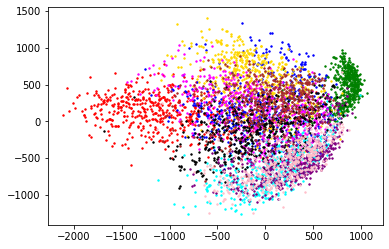

In [3]:
# Insert Code for Subtask 1.1 here

N=500  # Number of selected images
X = np.zeros(shape=(784, 10*N))   # Create the matrix to save images as column vectors

# Read images in each folder
for folder in range(0,10):
    for i in range(0,N):
        impath = './mnist/d'+str(folder)+'/d'+str(folder)+'_' + str(i+1).zfill(4) + '.png'
        # Translate the image to column vector
        image = np.array(imageio.imread(impath)).astype(np.float64).ravel()
        X[:,folder*N+i] = image

# Get first k principal components of data
S = linear_pca(X,2)

#plt.scatter(S[0,:],S[1,:])
plt.scatter(S[0,0:N],S[1,0:N],c = 'red',s=2)
plt.scatter(S[0,N:2*N],S[1,N:2*N],c = 'green',s=2)
plt.scatter(S[0,2*N:3*N],S[1,2*N:3*N],c = 'blue',s=2)
plt.scatter(S[0,3*N:4*N],S[1,3*N:4*N],c = 'gold',s=2)
plt.scatter(S[0,4*N:5*N],S[1,4*N:5*N],c = 'cyan',s=2)
plt.scatter(S[0,5*N:6*N],S[1,5*N:6*N],c = 'magenta',s=2)
plt.scatter(S[0,6*N:7*N],S[1,6*N:7*N],c = 'black',s=2)
plt.scatter(S[0,7*N:8*N],S[1,7*N:8*N],c = 'purple',s=2)
plt.scatter(S[0,8*N:9*N],S[1,8*N:9*N],c = 'brown',s=2)
plt.scatter(S[0,9*N:10*N],S[1,9*N:10*N],c = 'pink',s=2)

In order to show a more distinct distribution, we also use PCA for all of the images in d0, d1 and d2

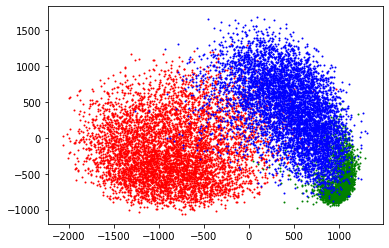

In [3]:
# import required libraries
import imageio
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# define to image paths which to import
impath0 = glob.glob('mnist_train/mnist/d0/*.png')
impath1 = glob.glob('mnist_train/mnist/d1/*.png')
impath2 = glob.glob('mnist_train/mnist/d2/*.png')
impath = [impath0, impath1, impath2]

# define a matrix to save the data
I = np.zeros([784,len(impath0)+len(impath1)+len(impath2)])

# import and convert to numpy array
index = 0
for i in range(3):
    for path in impath[i]:
        I[:,index] = np.array(imageio.imread(path)).astype(np.float64).flatten()
        index = index + 1
        
# calculate the ﬁrst 2 scores for selected data set       
S = linear_pca(I,2)

# visualize the ﬁrst 2 scores in a scatter plot
plt.scatter(S[0,0:len(impath0)],S[1,0:len(impath0)],c = 'red',s=1)
plt.scatter(S[0,len(impath0):len(impath0)+len(impath1)],S[1,len(impath0):len(impath0)+len(impath1)],c = 'green',s=1)
plt.scatter(S[0,len(impath0)+len(impath1):len(impath0)+len(impath1)+len(impath2)],S[1,len(impath0)+len(impath1):len(impath0)+len(impath1)+len(impath2)],c = 'blue',s=1)

In [5]:
def gram_pca(K,k):
    # Insert Code for Subtask 1.2 here
    
    # Centered gram matrix
    N = len(K)                  
    I = np.eye(N)               
    A = np.full((N, N), 1./N)   
    K_c = (I - A) @ K @ (I - A) 
    
    # SVD of K_c and principal components
    [V, Sigma2, VT] = np.linalg.svd(K_c, full_matrices = False)
    Sigma = np.sqrt(Sigma2)
    S = np.expand_dims(Sigma[:k],axis = 1)*VT[:k, :]
    
    return S

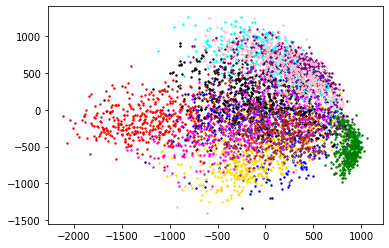

In [5]:
# Insert Code for Subtask 1.3 here

K = np.dot(X.T, X)
# Get first 2 principal components of data via gram_pca
S_gram = gram_pca(K, 2)
#plt.scatter(S_gram[0,:],S_gram[1,:])
plt.scatter(S_gram[0,0:N],S_gram[1,0:N],c = 'red',s=2)
plt.scatter(S_gram[0,N:2*N],S_gram[1,N:2*N],c = 'green',s=2)
plt.scatter(S_gram[0,2*N:3*N],S_gram[1,2*N:3*N],c = 'blue',s=2)
plt.scatter(S_gram[0,3*N:4*N],S_gram[1,3*N:4*N],c = 'gold',s=2)
plt.scatter(S_gram[0,4*N:5*N],S_gram[1,4*N:5*N],c = 'cyan',s=2)
plt.scatter(S_gram[0,5*N:6*N],S_gram[1,5*N:6*N],c = 'magenta',s=2)
plt.scatter(S_gram[0,6*N:7*N],S_gram[1,6*N:7*N],c = 'black',s=2)
plt.scatter(S_gram[0,7*N:8*N],S_gram[1,7*N:8*N],c = 'purple',s=2)
plt.scatter(S_gram[0,8*N:9*N],S_gram[1,8*N:9*N],c = 'brown',s=2)
plt.scatter(S_gram[0,9*N:10*N],S_gram[1,9*N:10*N],c = 'pink',s=2)

In order to show a more distinct distribution, we also use PCA for all of the images in d0, d1 and d2

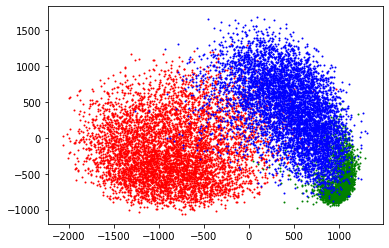

In [6]:
# calculate the ﬁrst 2 scores for selected data set    
S = gram_pca(I.T.dot(I),2)

# visualize the ﬁrst 2 scores in a scatter plot
plt.scatter(S[0,0:len(impath0)],S[1,0:len(impath0)],c = 'red',s=1)
plt.scatter(S[0,len(impath0):len(impath0)+len(impath1)],S[1,len(impath0):len(impath0)+len(impath1)],c = 'green',s=1)
plt.scatter(S[0,len(impath0)+len(impath1):len(impath0)+len(impath1)+len(impath2)],S[1,len(impath0)+len(impath1):len(impath0)+len(impath1)+len(impath2)],c = 'blue',s=1)

In [8]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    
    K = np.zeros((X.shape[1], X.shape[1]))
    
    for i in range(X.shape[1]):
        for j in range(i):
            # Squared norm for each of the pair difference
            sq_norm = np.sum((X[:, i] - X[:, j])*(X[:, i] - X[:, j]))
            # Calculate gaussian kernel
            K[i, j] = np.exp(-sq_norm/(2*(sigma**2)))
            # K is symmetric
            K[j, i] = K[i, j]
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

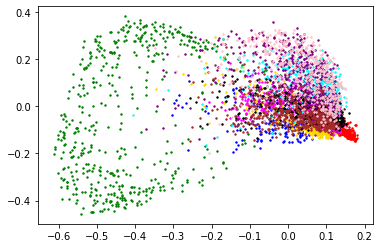

In [7]:
#Insert Code for Subtask 1.5 here
sigma = 1000
S = gaussian_kernel_pca(X, 2, sigma)
#plt.scatter(S[0,:], S[1,:])
plt.scatter(S[0,0:N],S[1,0:N],c = 'red',s=2)
plt.scatter(S[0,N:2*N],S[1,N:2*N],c = 'green',s=2)
plt.scatter(S[0,2*N:3*N],S[1,2*N:3*N],c = 'blue',s=2)
plt.scatter(S[0,3*N:4*N],S[1,3*N:4*N],c = 'gold',s=2)
plt.scatter(S[0,4*N:5*N],S[1,4*N:5*N],c = 'cyan',s=2)
plt.scatter(S[0,5*N:6*N],S[1,5*N:6*N],c = 'magenta',s=2)
plt.scatter(S[0,6*N:7*N],S[1,6*N:7*N],c = 'black',s=2)
plt.scatter(S[0,7*N:8*N],S[1,7*N:8*N],c = 'purple',s=2)
plt.scatter(S[0,8*N:9*N],S[1,8*N:9*N],c = 'brown',s=2)
plt.scatter(S[0,9*N:10*N],S[1,9*N:10*N],c = 'pink',s=2)

In order to show a more distinct distribution, we also use PCA for all of the images in d0, d1 and d2

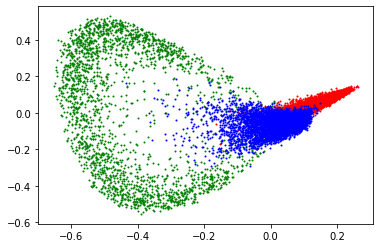

In [9]:
# calculate the ﬁrst 2 scores for selected data set    
S = gaussian_kernel_pca(I,2,1000)

# visualize the ﬁrst 2 scores in a scatter plot
plt.scatter(S[0,0:len(impath0)],S[1,0:len(impath0)],c = 'red',s=1)
plt.scatter(S[0,len(impath0):len(impath0)+len(impath1)],S[1,len(impath0):len(impath0)+len(impath1)],c = 'green',s=1)
plt.scatter(S[0,len(impath0)+len(impath1):len(impath0)+len(impath1)+len(impath2)],S[1,len(impath0)+len(impath1):len(impath0)+len(impath1)+len(impath2)],c = 'blue',s=1)

Analysis of the inverse results

Sometimes we get the results (scores) with opposite sign by using different methods, they are both correct, the reason for that is:
if the SVD of matrix $X$ is 
\begin{equation}
[\underline{u}_1 \underline{u}_2 \cdots \underline{u}_m] \Sigma 
\left[
  \begin{array}{c}
    \underline{v}_1^T\\
    \underline{v}_2^T\\
    \vdots\\
    \underline{v}_n^T
  \end{array}
\right]
\end{equation}
Then, 
\begin{equation}
[-\underline{u}_1 \underline{u}_2 \cdots \underline{u}_m] \Sigma 
\left[
  \begin{array}{c}
    -\underline{v}_1^T\\
    \underline{v}_2^T\\
    \vdots\\
    \underline{v}_n^T
  \end{array}
\right]
\quad or \quad 
[\underline{u}_1 -\underline{u}_2 \cdots \underline{u}_m] \Sigma 
\left[
  \begin{array}{c}
    \underline{v}_1^T\\
    -\underline{v}_2^T\\
    \vdots\\
    \underline{v}_n^T
  \end{array}
\right]
\end{equation}
are all possible SVD of matrix $X$ (The same for SVD of $X^TX$). Because we only use $\Sigma_k V_k^T$ to calculate the k-score, sometimes the sign of the score is opposite based on the SVD calculated by the programm.